<a href="https://colab.research.google.com/github/sagihaider/EEG_Deep/blob/master/main_Single_Trial_Classification_Accuracy_all_subjects_FilteredData_Binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/sagihaider/EEG_Deep.git

Cloning into 'EEG_Deep'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 85 (delta 15), reused 0 (delta 0), pack-reused 53
Unpacking objects: 100% (85/85), done.
Checking out files: 100% (28/28), done.


In [2]:
import scipy.io as spio
import numpy as np
from importlib.machinery import SourceFileLoader

# EEGNet-specific imports
from EEG_Deep.EEGModels import EEGNet, ShallowConvNet, DeepConvNet
from tensorflow.keras import utils as np_utils
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
K.set_image_data_format('channels_first')

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

# tools for plotting confusion matrices
from matplotlib import pyplot as plt
from scipy.signal import butter, lfilter

In [0]:
# Band-pass Filter
def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y


EEG_Deep/Data2A/Data_A01T.mat
Filtering of Training Data Finished
EEG_Deep/Data2A/Data_A01E.mat
Filtering of Testing Data Finished
(1, 2)
Finding labels in training data
Finding labels in testing data
[1 2 2 1 2 2 2 2 2 1 1 1 1 2 2 1 1 1 2 2 1 1 2 1]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.32278, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.2717 - acc: 0.3750 - val_loss: 1.3228

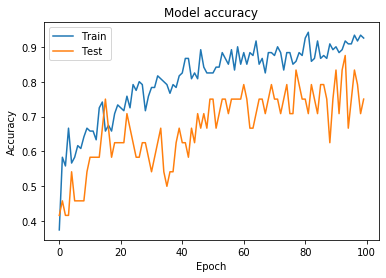


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.7382 - acc: 0.6042
test loss, test acc: [0.7382366353025039, 0.6041667]
(1, 3)
Finding labels in training data
Finding labels in testing data
[1 3 3 3 1 3 3 3 1 1 3 1 3 1 1 1 3 3 1 3 1 3 1 1]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.33968, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.2788

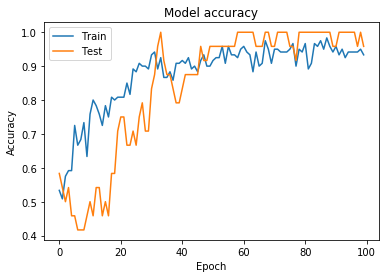


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.1831 - acc: 0.9236
test loss, test acc: [0.1830774729657302, 0.9236111]
(1, 4)
Finding labels in training data
Finding labels in testing data
[1 4 4 4 4 4 4 1 4 4 1 4 1 4 1 1 1 4 1 4 1 1 1 1]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.32870, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.2926

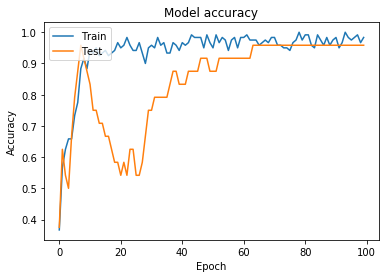


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.1117 - acc: 0.9653
test loss, test acc: [0.11172726692550189, 0.9652778]
(2, 3)
Finding labels in training data
Finding labels in testing data
[2 3 3 2 3 2 2 2 3 2 3 2 3 3 3 2 2 3 3 3 2 2 3 2]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.36421, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.279

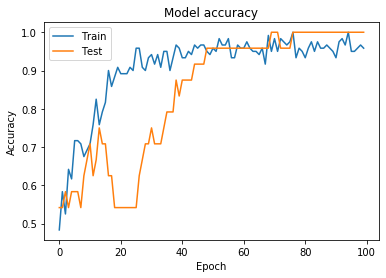


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.0568 - acc: 0.9931
test loss, test acc: [0.05675247447420083, 0.9930556]
(2, 4)
Finding labels in training data
Finding labels in testing data
[4 2 4 4 4 4 2 4 2 2 2 2 4 4 2 4 4 2 2 4 4 2 2 2]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.33429, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.286

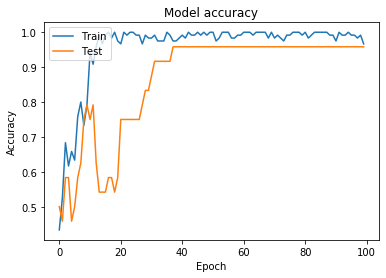


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.0217 - acc: 1.0000
test loss, test acc: [0.021715876544324903, 1.0]
(3, 4)
Finding labels in training data
Finding labels in testing data
[4 4 4 3 4 4 3 4 3 3 4 3 4 3 4 3 4 3 4 4 3 3 3 3]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.37431, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.2743 - a

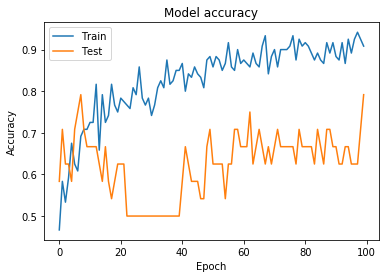


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.6167 - acc: 0.6806
test loss, test acc: [0.6167261252347898, 0.6805556]
EEG_Deep/Data2A/Data_A02T.mat
Filtering of Training Data Finished
EEG_Deep/Data2A/Data_A02E.mat
Filtering of Testing Data Finished
(1, 2)
Finding labels in training data
Finding labels in testing data
[1 2 1 1 2 2 2 1 2 2 2 2 2 1 2 2 1 1 1 1 1 1 2 1]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samp

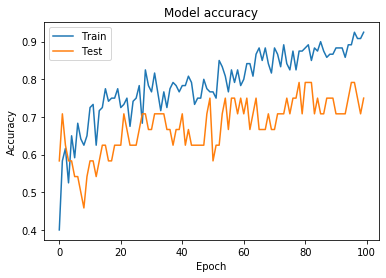


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.5443 - acc: 0.7431
test loss, test acc: [0.544332781366797, 0.7430556]
(1, 3)
Finding labels in training data
Finding labels in testing data
[3 1 1 1 3 3 1 3 1 3 1 1 1 1 1 1 3 3 3 3 3 3 1 3]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.36064, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.2473 

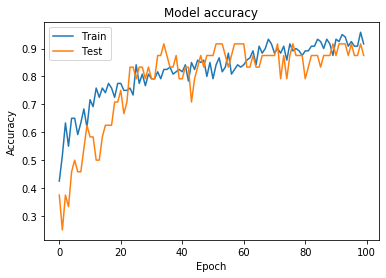


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.7523 - acc: 0.7431
test loss, test acc: [0.7522684802386519, 0.7430556]
(1, 4)
Finding labels in training data
Finding labels in testing data
[1 4 4 1 1 4 1 4 4 4 4 4 1 1 4 1 4 1 1 1 1 4 4 1]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.36309, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.2567

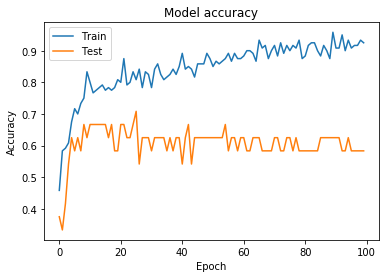


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.5741 - acc: 0.7569
test loss, test acc: [0.5741290540900081, 0.7569444]
(2, 3)
Finding labels in training data
Finding labels in testing data
[3 2 3 3 2 2 2 2 2 2 2 2 3 2 3 2 3 3 2 3 3 3 3 3]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.37537, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.3675

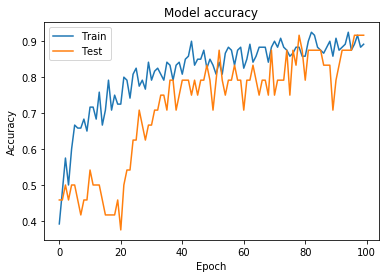


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.5787 - acc: 0.7431
test loss, test acc: [0.5786896880664345, 0.7430556]
(2, 4)
Finding labels in training data
Finding labels in testing data
[4 2 4 2 4 2 2 2 4 4 2 2 2 2 4 4 4 2 2 4 4 4 2 4]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.36085, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.2647

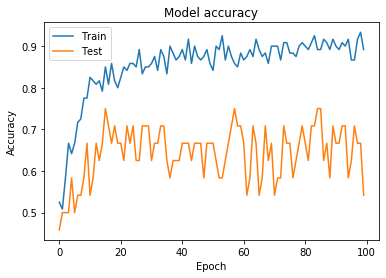


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.6090 - acc: 0.7153
test loss, test acc: [0.6089561567124393, 0.7152778]
(3, 4)
Finding labels in training data
Finding labels in testing data
[3 4 4 3 3 4 4 4 4 4 3 4 3 4 4 3 3 4 3 3 3 4 3 3]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.28352, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.2922

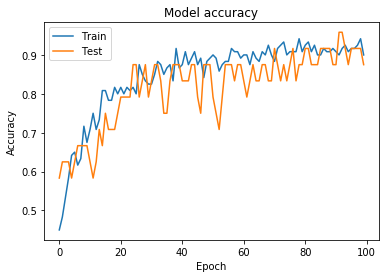


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.5338 - acc: 0.7569
test loss, test acc: [0.5337673293931099, 0.7569444]
EEG_Deep/Data2A/Data_A03T.mat
Filtering of Training Data Finished
EEG_Deep/Data2A/Data_A03E.mat
Filtering of Testing Data Finished
(1, 2)
Finding labels in training data
Finding labels in testing data
[1 2 1 1 2 2 2 1 2 2 2 2 2 1 2 2 1 1 1 1 1 1 2 1]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samp

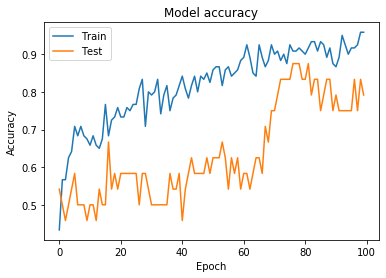


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.4185 - acc: 0.8056
test loss, test acc: [0.41849440813126015, 0.8055556]
(1, 3)
Finding labels in training data
Finding labels in testing data
[3 1 1 1 3 3 1 3 1 3 1 1 1 1 1 1 3 3 3 3 3 3 1 3]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.21972, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.264

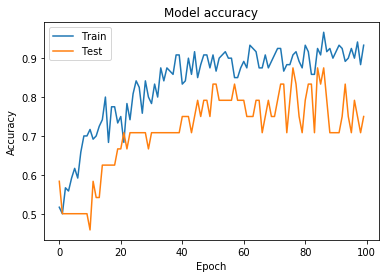


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.2968 - acc: 0.8681
test loss, test acc: [0.296795708780337, 0.8680556]
(1, 4)
Finding labels in training data
Finding labels in testing data
[1 4 4 1 1 4 1 4 4 4 4 4 1 1 4 1 4 1 1 1 1 4 4 1]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.36602, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.3477 

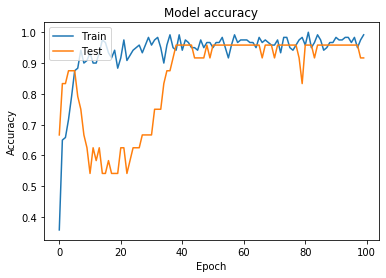


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.1226 - acc: 0.9444
test loss, test acc: [0.1226305394659085, 0.9444444]
(2, 3)
Finding labels in training data
Finding labels in testing data
[3 2 3 3 2 2 2 2 2 2 2 2 3 2 3 2 3 3 2 3 3 3 3 3]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.35622, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.3153

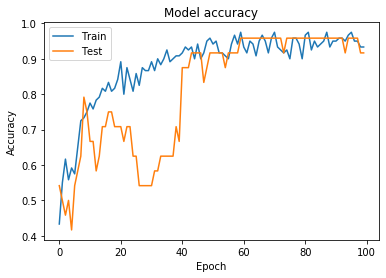


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.5276 - acc: 0.7917
test loss, test acc: [0.5275653494662341, 0.7916667]
(2, 4)
Finding labels in training data
Finding labels in testing data
[4 2 4 2 4 2 2 2 4 4 2 2 2 2 4 4 4 2 2 4 4 4 2 4]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.33978, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.2960

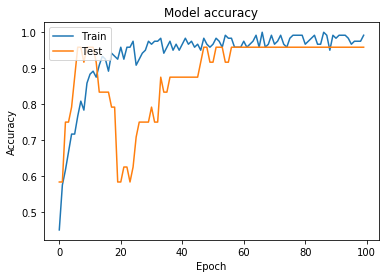


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.0802 - acc: 0.9722
test loss, test acc: [0.08022715748490504, 0.9722222]
(3, 4)
Finding labels in training data
Finding labels in testing data
[3 4 4 3 3 4 4 4 4 4 3 4 3 4 4 3 3 4 3 3 3 4 3 3]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.27413, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.273

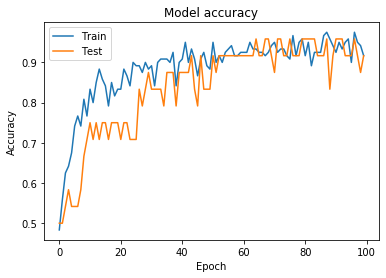


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.3918 - acc: 0.8403
test loss, test acc: [0.39177352720354164, 0.8402778]
EEG_Deep/Data2A/Data_A04T.mat
Filtering of Training Data Finished
EEG_Deep/Data2A/Data_A04E.mat
Filtering of Testing Data Finished
(1, 2)
Finding labels in training data
Finding labels in testing data
[2 1 1 1 2 2 1 2 1 2 1 2 2 2 1 1 2 1 2 2 1 1 2 1]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 sam

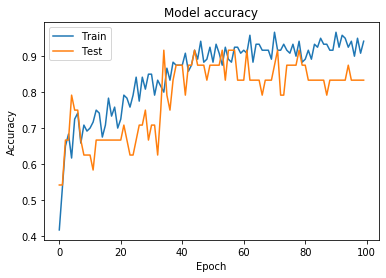


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.4066 - acc: 0.8681
test loss, test acc: [0.40660310100712294, 0.8680556]
(1, 3)
Finding labels in training data
Finding labels in testing data
[1 3 3 1 1 3 1 3 1 3 1 3 1 1 1 3 3 1 3 3 3 3 1 1]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.30325, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.285

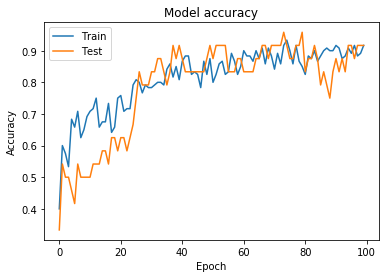


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.4014 - acc: 0.8611
test loss, test acc: [0.40141664977030206, 0.8611111]
(1, 4)
Finding labels in training data
Finding labels in testing data
[4 1 4 1 1 4 4 4 1 4 1 4 4 4 1 4 1 1 4 1 1 4 1 1]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.31080, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.280

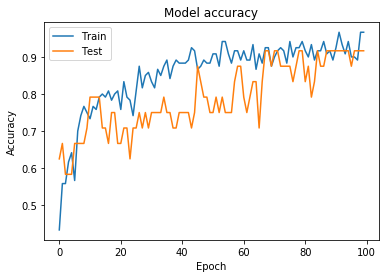


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.3027 - acc: 0.8681
test loss, test acc: [0.3026976690571751, 0.8680556]
(2, 3)
Finding labels in training data
Finding labels in testing data
[2 3 3 3 2 2 3 2 3 2 2 2 3 2 2 3 2 2 3 3 3 3 3 2]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.43457, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.2844

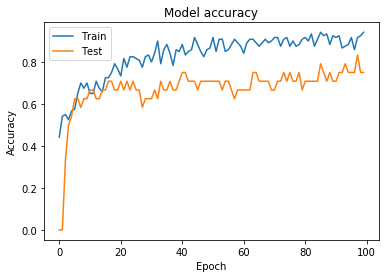


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.4691 - acc: 0.8194
test loss, test acc: [0.4691364755530635, 0.8194444]
(2, 4)
Finding labels in training data
Finding labels in testing data
[2 4 4 2 4 4 4 2 2 4 4 2 4 4 2 2 4 2 4 2 2 2 4 2]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.34921, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.2864

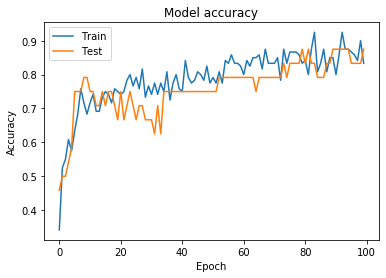


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.4923 - acc: 0.7708
test loss, test acc: [0.49225001687753117, 0.7708333]
(3, 4)
Finding labels in training data
Finding labels in testing data
[4 3 3 4 3 4 4 4 3 4 4 3 4 4 3 4 4 3 3 4 3 3 3 3]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.32162, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.333

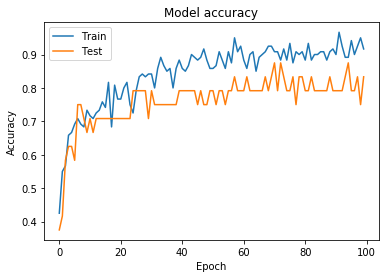


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.4889 - acc: 0.7708
test loss, test acc: [0.48888914880808443, 0.7708333]
EEG_Deep/Data2A/Data_A05T.mat
Filtering of Training Data Finished
EEG_Deep/Data2A/Data_A05E.mat
Filtering of Testing Data Finished
(1, 2)
Finding labels in training data
Finding labels in testing data
[1 2 1 1 2 2 2 1 2 2 2 2 2 1 2 2 1 1 1 1 1 1 2 1]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 sam

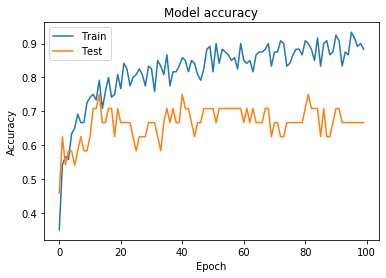


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.6360 - acc: 0.6944
test loss, test acc: [0.6359768412852039, 0.6944444]
(1, 3)
Finding labels in training data
Finding labels in testing data
[3 1 1 1 3 3 1 3 1 3 1 1 1 1 1 1 3 3 3 3 3 3 1 3]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.30798, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.3251

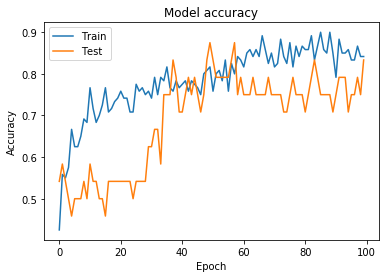


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.6854 - acc: 0.6319
test loss, test acc: [0.6853764733920494, 0.6319444]
(1, 4)
Finding labels in training data
Finding labels in testing data
[1 4 4 1 1 4 1 4 4 4 4 4 1 1 4 1 4 1 1 1 1 4 4 1]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.36669, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.3320

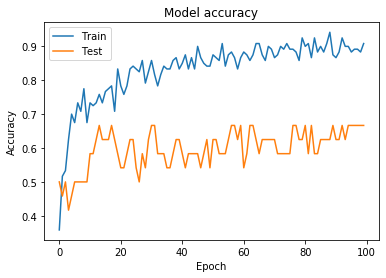


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.6193 - acc: 0.6806
test loss, test acc: [0.61928471038118, 0.6805556]
(2, 3)
Finding labels in training data
Finding labels in testing data
[3 2 3 3 2 2 2 2 2 2 2 2 3 2 3 2 3 3 2 3 3 3 3 3]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.36275, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.3590 -

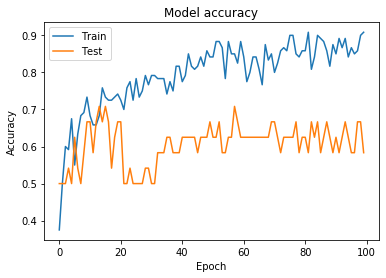


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.6494 - acc: 0.6944
test loss, test acc: [0.649410102257712, 0.6944444]
(2, 4)
Finding labels in training data
Finding labels in testing data
[4 2 4 2 4 2 2 2 4 4 2 2 2 2 4 4 4 2 2 4 4 4 2 4]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.33458, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.3461 

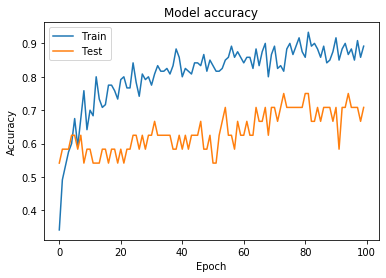


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.5739 - acc: 0.7153
test loss, test acc: [0.5739256451941199, 0.7152778]
(3, 4)
Finding labels in training data
Finding labels in testing data
[3 4 4 3 3 4 4 4 4 4 3 4 3 4 4 3 3 4 3 3 3 4 3 3]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.34815, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.2352

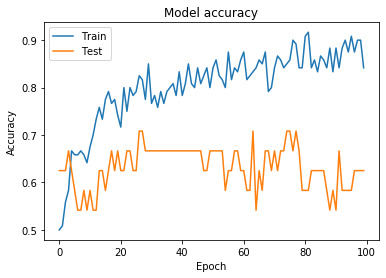


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.7025 - acc: 0.6042
test loss, test acc: [0.702494193191847, 0.6041667]
EEG_Deep/Data2A/Data_A06T.mat
Filtering of Training Data Finished
EEG_Deep/Data2A/Data_A06E.mat
Filtering of Testing Data Finished
(1, 2)
Finding labels in training data
Finding labels in testing data
[1 1 1 2 2 2 2 1 2 1 2 1 1 2 1 2 2 1 1 2 1 2 1 2]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 sampl

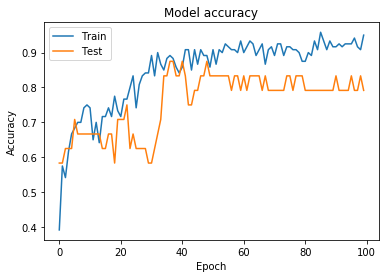


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.4821 - acc: 0.7569
test loss, test acc: [0.48213142905539524, 0.7569444]
(1, 3)
Finding labels in training data
Finding labels in testing data
[1 1 3 3 1 3 3 3 3 1 1 3 3 1 1 1 3 3 3 1 1 1 1 3]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.34938, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.294

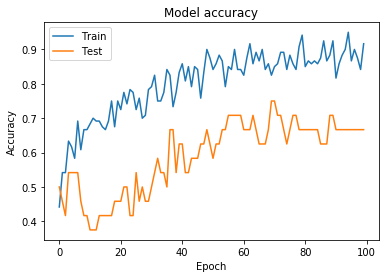


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.6388 - acc: 0.6806
test loss, test acc: [0.638821671781544, 0.6805556]
(1, 4)
Finding labels in training data
Finding labels in testing data
[1 1 1 4 4 4 1 4 1 4 1 1 4 1 4 4 4 1 1 1 4 4 4 1]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.34359, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.2773 

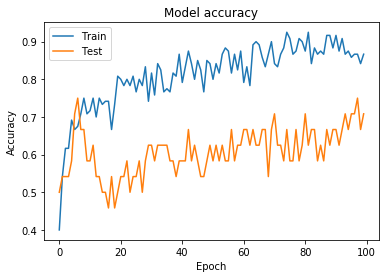


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.6494 - acc: 0.6597
test loss, test acc: [0.6493802595133376, 0.6597222]
(2, 3)
Finding labels in training data
Finding labels in testing data
[3 3 3 3 2 2 2 3 3 2 2 3 2 3 2 2 2 3 3 3 2 2 2 3]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.39529, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.2962

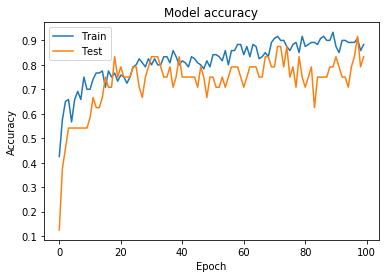


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.5040 - acc: 0.7847
test loss, test acc: [0.5040172036064582, 0.7847222]
(2, 4)
Finding labels in training data
Finding labels in testing data
[4 2 2 4 2 4 2 2 4 2 4 2 4 4 2 2 4 4 2 4 2 4 4 2]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.23637, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.3668

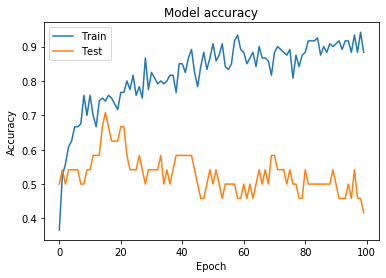


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.7155 - acc: 0.5833
test loss, test acc: [0.7155462681936721, 0.5833333]
(3, 4)
Finding labels in training data
Finding labels in testing data
[3 3 3 3 4 4 3 4 3 4 3 3 4 4 4 3 3 4 4 3 4 4 4 3]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.32205, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.3372

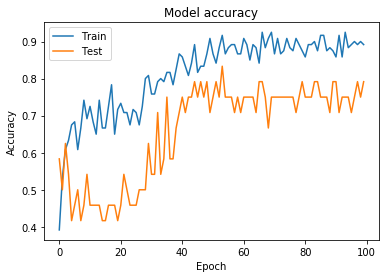


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.5418 - acc: 0.7361
test loss, test acc: [0.5418411552155804, 0.7361111]
EEG_Deep/Data2A/Data_A07T.mat
Filtering of Training Data Finished
EEG_Deep/Data2A/Data_A07E.mat
Filtering of Testing Data Finished
(1, 2)
Finding labels in training data
Finding labels in testing data
[1 2 1 1 2 2 2 1 2 2 2 2 2 1 2 2 1 1 1 1 1 1 2 1]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samp

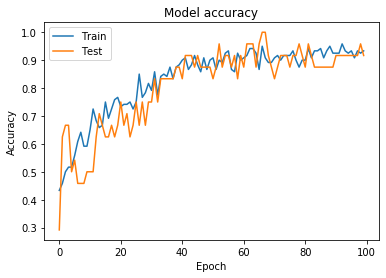


# Evaluate on test data
144/144 [==============================] - 0s 2ms/sample - loss: 0.4174 - acc: 0.8333
test loss, test acc: [0.4174113635025505, 0.8333333]
(1, 3)
Finding labels in training data
Finding labels in testing data
[3 1 1 1 3 3 1 3 1 3 1 1 1 1 1 1 3 3 3 3 3 3 1 3]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.34651, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.3410

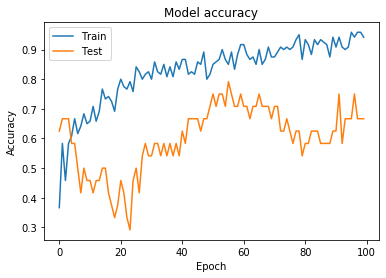


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.3239 - acc: 0.8542
test loss, test acc: [0.3238955686004677, 0.8541667]
(1, 4)
Finding labels in training data
Finding labels in testing data
[1 4 4 1 1 4 1 4 4 4 4 4 1 1 4 1 4 1 1 1 1 4 4 1]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.34813, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.4188

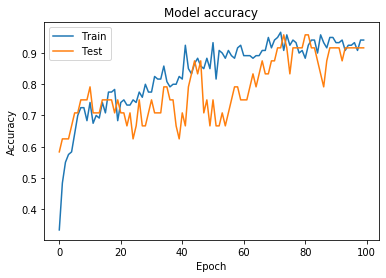


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.3151 - acc: 0.8611
test loss, test acc: [0.3150628634691657, 0.8611111]
(2, 3)
Finding labels in training data
Finding labels in testing data
[3 2 3 3 2 2 2 2 2 2 2 2 3 2 3 2 3 3 2 3 3 3 3 3]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.36262, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.3577

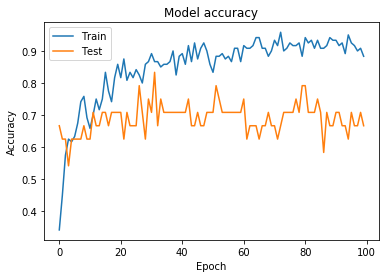


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.6331 - acc: 0.6875
test loss, test acc: [0.633073742630788, 0.6875]
(2, 4)
Finding labels in training data
Finding labels in testing data
[4 2 4 2 4 2 2 2 4 4 2 2 2 2 4 4 4 2 2 4 4 4 2 4]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.39291, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.3071 - a

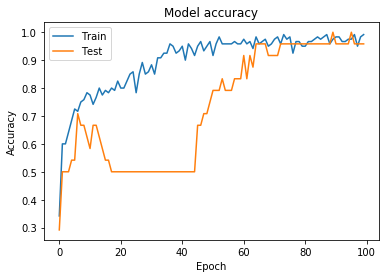


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.0960 - acc: 0.9792
test loss, test acc: [0.09598147679763416, 0.9791667]
(3, 4)
Finding labels in training data
Finding labels in testing data
[3 4 4 3 3 4 4 4 4 4 3 4 3 4 4 3 3 4 3 3 3 4 3 3]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.32241, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.258

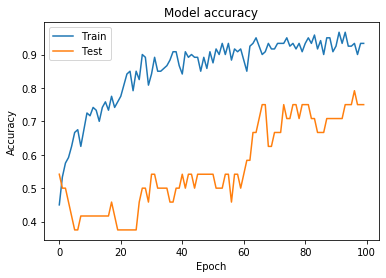


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.4602 - acc: 0.8194
test loss, test acc: [0.4602417400594479, 0.8194444]
EEG_Deep/Data2A/Data_A08T.mat
Filtering of Training Data Finished
EEG_Deep/Data2A/Data_A08E.mat
Filtering of Testing Data Finished
(1, 2)
Finding labels in training data
Finding labels in testing data
[1 2 1 1 2 2 2 1 2 2 2 2 2 1 2 2 1 1 1 1 1 1 2 1]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samp

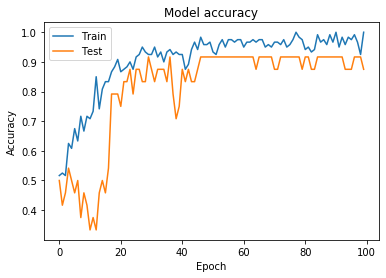


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.1400 - acc: 0.9444
test loss, test acc: [0.14004844424279225, 0.9444444]
(1, 3)
Finding labels in training data
Finding labels in testing data
[3 1 1 1 3 3 1 3 1 3 1 1 1 1 1 1 3 3 3 3 3 3 1 3]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.31240, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.284

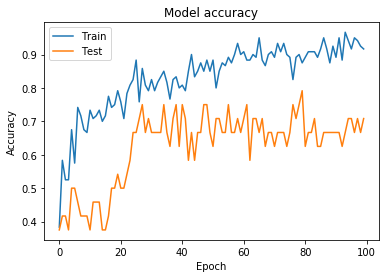


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.4613 - acc: 0.7569
test loss, test acc: [0.4612866170500638, 0.7569444]
(1, 4)
Finding labels in training data
Finding labels in testing data
[1 4 4 1 1 4 1 4 4 4 4 4 1 1 4 1 4 1 1 1 1 4 4 1]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.32639, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.2758

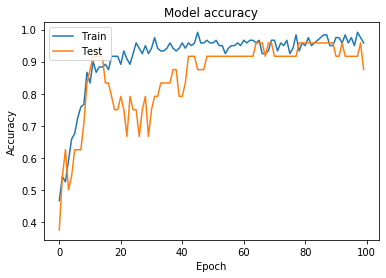


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.2031 - acc: 0.9444
test loss, test acc: [0.20314233652536334, 0.9444444]
(2, 3)
Finding labels in training data
Finding labels in testing data
[3 2 3 3 2 2 2 2 2 2 2 2 3 2 3 2 3 3 2 3 3 3 3 3]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.34944, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.373

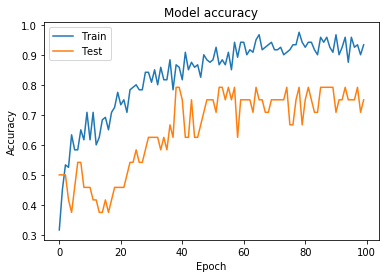


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.4686 - acc: 0.8194
test loss, test acc: [0.4685677373329074, 0.8194444]
(2, 4)
Finding labels in training data
Finding labels in testing data
[4 2 4 2 4 2 2 2 4 4 2 2 2 2 4 4 4 2 2 4 4 4 2 4]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.27272, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.3732

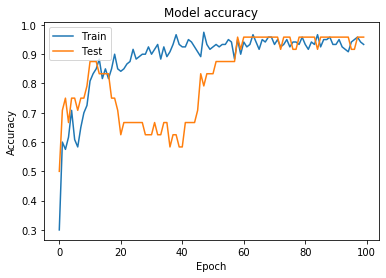


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.3108 - acc: 0.8958
test loss, test acc: [0.3107623743352532, 0.8958333]
(3, 4)
Finding labels in training data
Finding labels in testing data
[3 4 4 3 3 4 4 4 4 4 3 4 3 4 4 3 3 4 3 3 3 4 3 3]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.30947, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.2917

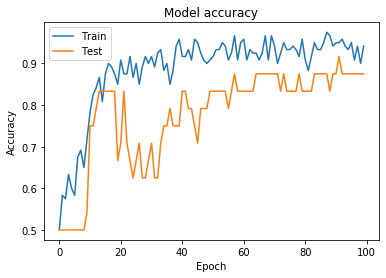


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.4109 - acc: 0.8125
test loss, test acc: [0.4109300673237865, 0.8125]
EEG_Deep/Data2A/Data_A09T.mat
Filtering of Training Data Finished
EEG_Deep/Data2A/Data_A09E.mat
Filtering of Testing Data Finished
(1, 2)
Finding labels in training data
Finding labels in testing data
[1 1 1 2 2 2 2 1 2 1 2 1 1 2 1 2 2 1 1 2 1 2 1 2]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples

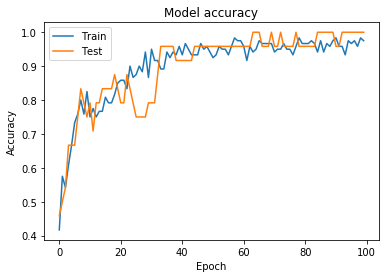


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.2828 - acc: 0.9167
test loss, test acc: [0.2827657812678126, 0.9166667]
(1, 3)
Finding labels in training data
Finding labels in testing data
[1 1 3 3 1 3 3 3 3 1 1 3 3 1 1 1 3 3 3 1 1 1 1 3]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.30114, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.3005

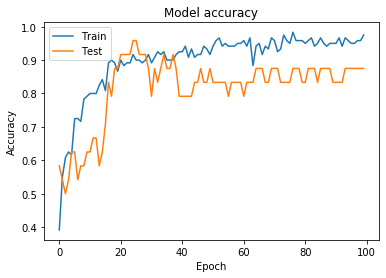


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.2151 - acc: 0.9236
test loss, test acc: [0.21509243326934463, 0.9236111]
(1, 4)
Finding labels in training data
Finding labels in testing data
[1 1 1 4 4 4 1 4 1 4 1 1 4 1 4 4 4 1 1 1 4 4 4 1]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.32587, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.331

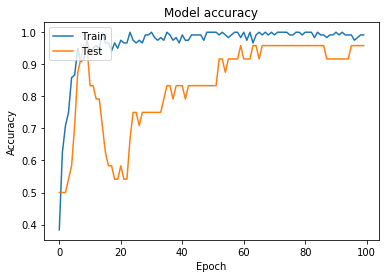


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.0727 - acc: 0.9792
test loss, test acc: [0.07270272655741097, 0.9791667]
(2, 3)
Finding labels in training data
Finding labels in testing data
[3 3 3 3 2 2 2 3 3 2 2 3 2 3 2 2 2 3 3 3 2 2 2 3]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.35667, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.286

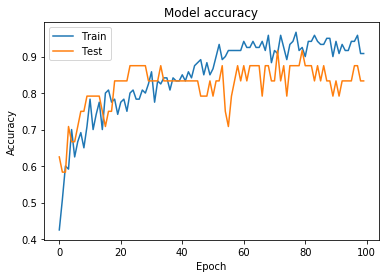


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.4105 - acc: 0.7986
test loss, test acc: [0.4104602062976078, 0.7986111]
(2, 4)
Finding labels in training data
Finding labels in testing data
[4 2 2 4 2 4 2 2 4 2 4 2 4 4 2 2 4 4 2 4 2 4 4 2]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.31098, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.2812

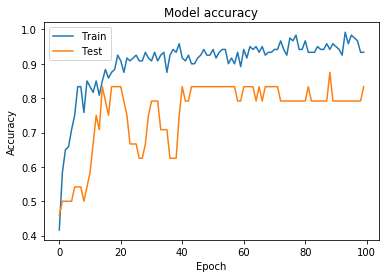


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.3645 - acc: 0.8194
test loss, test acc: [0.36447918878992724, 0.8194444]
(3, 4)
Finding labels in training data
Finding labels in testing data
[3 3 3 3 4 4 3 4 3 4 3 3 4 4 4 3 3 4 4 3 4 4 4 3]
(120, 22, 750)
(120,)
(24, 22, 750)
(24,)
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
X_train shape: (120, 1, 22, 750)
120 train samples
24 val samples
(144, 22, 750)
(144, 1)
X_train shape: (144, 1, 22, 750)
144 train samples
Train on 120 samples, validate on 24 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.36191, saving model to /tmp/checkpoint.h5
120/120 - 1s - loss: 1.323

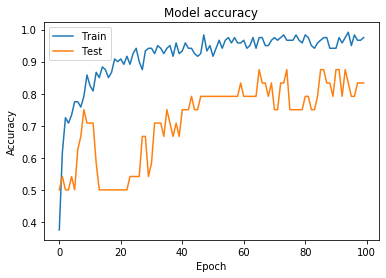


# Evaluate on test data
144/144 [==============================] - 0s 3ms/sample - loss: 0.2160 - acc: 0.9236
test loss, test acc: [0.2160016100588109, 0.9236111]
[[0.18307747 0.11172727 0.05675247 0.02171588 0.61672613 0.73823664]
 [0.75226848 0.57412905 0.57868969 0.60895616 0.53376733 0.54433278]
 [0.29679571 0.12263054 0.52756535 0.08022716 0.39177353 0.41849441]
 [0.40141665 0.30269767 0.46913648 0.49225002 0.48888915 0.4066031 ]
 [0.68537647 0.61928471 0.6494101  0.57392565 0.70249419 0.63597684]
 [0.63882167 0.64938026 0.5040172  0.71554627 0.54184116 0.48213143]
 [0.32389557 0.31506286 0.63307374 0.09598148 0.46024174 0.41741136]
 [0.46128662 0.20314234 0.46856774 0.31076237 0.41093007 0.14004844]
 [0.21509243 0.07270273 0.41046021 0.36447919 0.21600161 0.28276578]]
[[0.9236111  0.96527779 0.99305558 1.         0.68055558 0.60416669]
 [0.74305558 0.75694442 0.74305558 0.71527779 0.75694442 0.74305558]
 [0.86805558 0.94444442 0.79166669 0.97222221 0.84027779 0.80555558]
 [0.861

<Figure size 432x288 with 0 Axes>

In [24]:
from numpy import zeros
K.clear_session()
cols = 6
rows = 9
acc_all = zeros([rows, cols])
loss_all = zeros([rows, cols])
X_tr_c12 = np.empty([288, 22, 1875])
X_ts_c12 = np.empty([288, 22, 1875])
result=[]

from itertools import combinations 
comb = combinations([1, 2, 3,4], 2) 
  # Print the obtained combinations 
bincomb=[]
for i in list(comb): 
    bincomb.append(i)

for x in range(1,10):
  fName = 'EEG_Deep/Data2A/Data_A0' + str(x) + 'T.mat'  # Load Data
  print(fName)
  mat = spio.loadmat(fName)
  r_X_tr = mat['cleanRawEEGData']
  r_y_tr = mat['cleanClassLabels']

  ### Filter Data ###
  for t in range(r_X_tr.shape[0]):
    tril = r_X_tr[t,:,:]
    # tril = tril.transpose()
    tril_filtered = butter_bandpass_filter(tril, 
                                              lowcut=4, 
                                              highcut=40, 
                                              fs=250,
                                              order=4)
    # tril_filtered = tril_filtered.transpose()
    X_tr_c12[t,:,:] = tril_filtered

  print("Filtering of Training Data Finished")
  ## Test Data Load 

  fName = 'EEG_Deep/Data2A/Data_A0' + str(x) + 'E.mat'  # Load Data
  print(fName)
  mat = spio.loadmat(fName)
  r_X_ts = mat['cleanRawEEGData']
  r_y_ts = mat['cleanClassLabels']
  for t in range(r_X_ts.shape[0]):
    tril = r_X_ts[t,:,:]
    # tril = tril.transpose()
    tril_filtered = butter_bandpass_filter(tril, 
                                              lowcut=4, 
                                              highcut=40, 
                                              fs=250,
                                              order=4)
    # tril_filtered = tril_filtered.transpose()
    X_ts_c12[t,:,:] = tril_filtered
  
  print("Filtering of Testing Data Finished")    

  for k, com in enumerate(bincomb):
      print(com)
      # # Find labels to specific class
      print("Finding labels in training data")
      class1indx = list(np.where(r_y_tr == com[0]))
      class2indx = list(np.where(r_y_tr == com[1]))
      c1=list(class1indx[0])
      c2=list(class2indx[0])
      y_tr_c12 = c1 + c2
      y_tr_c12.sort()
      # print(y_tr_c12)
      x_tr_12 = X_tr_c12[y_tr_c12,:,:]
      y_tr_12 = r_y_tr[y_tr_c12]
      # print(np.shape(x_tr_12))
      # print(np.shape(y_tr_12))
      # # Find labels to specific class
      print("Finding labels in testing data")
      class1indx = list(np.where(r_y_ts == com[0]))
      class2indx = list(np.where(r_y_ts == com[1]))
      c1=list(class1indx[0])
      c2=list(class2indx[0])
      y_ts_c12 = c1 + c2
      y_ts_c12.sort()
      # print(y_ts_c12)
      x_ts_12 = X_ts_c12[y_ts_c12,:,:]
      y_ts_12 = r_y_ts[y_ts_c12]
      # print(np.shape(x_ts_12))
      # print(np.shape(y_ts_12))
      del class1indx, class2indx, c1, c2
      # split data of each subject in training and validation
      X_train = x_tr_12[0:120,:,500:1250]
      Y_train = y_tr_12[0:120].ravel()
      X_val   = x_tr_12[120:,:,500:1250]
      Y_val   = y_tr_12[120:].ravel()
      print(Y_val)
      print(np.shape(X_train))
      print(np.shape(Y_train))
      print(np.shape(X_val))
      print(np.shape(Y_val))
  
      # convert labels to one-hot encodings.
      Y_train      = np_utils.to_categorical(Y_train-1, num_classes=4)
      Y_val       = np_utils.to_categorical(Y_val-1, num_classes=4)
      print(Y_val)

      kernels, chans, samples = 1, 22, 750
      # convert data to NCHW (trials, kernels, channels, samples) format. Data 
      # contains 22 channels and 500 time-points. Set the number of kernels to 1.
      X_train = X_train.reshape(X_train.shape[0], kernels, chans, samples)
      X_val   = X_val.reshape(X_val.shape[0], kernels, chans, samples)
   
      print('X_train shape:', X_train.shape)
      print(X_train.shape[0], 'train samples')
      print(X_val.shape[0], 'val samples')

      X_test      = x_ts_12[:,:,500:1250]
      Y_test      = y_ts_12[:]
      print(np.shape(X_test))
      print(np.shape(Y_test))

      #convert labels to one-hot encodings.
      Y_test      = np_utils.to_categorical(Y_test-1, num_classes=4)

      # convert data to NCHW (trials, kernels, channels, samples) format. Data 
      # contains 22 channels and 500 time-points. Set the number of kernels to 1.
      X_test      = X_test.reshape(X_test.shape[0], kernels, chans, samples)

      print('X_train shape:', X_test.shape)
      print(X_test.shape[0], 'train samples')

      # configure the EEGNet-8,2,16 model with kernel length of 32 samples (other 
      # model configurations may do better, but this is a good starting point)
      model = EEGNet(nb_classes = 4, Chans = 22, Samples = 750,
                     dropoutRate = 0.5, kernLength = 25, F1 = 8, 
                     D = 2, F2 = 16, norm_rate = 0.25, dropoutType = 'Dropout')
      
      # compile the model and set the optimizers
      model.compile(loss='categorical_crossentropy', optimizer='adam', 
                    metrics = ['accuracy'])

      # count number of parameters in the model
      numParams    = model.count_params() 

      # set a valid path for your system to record model checkpoints
      checkpointer = ModelCheckpoint(filepath='/tmp/checkpoint.h5', verbose=1,
                                     save_best_only=True)
  
      # the syntax is {class_1:weight_1, class_2:weight_2,...}. Here just setting
      # the weights all to be 1
      class_weights = {0:1, 1:1, 2:1, 3:1}

      history = model.fit(X_train, Y_train, batch_size = 16, epochs = 100, 
                      verbose = 2, validation_data=(X_val, Y_val),
                      callbacks=[checkpointer], class_weight = class_weights)
  
      # Plot training & validation accuracy values
      plt.plot(history.history['acc'])
      plt.plot(history.history['val_acc'])
      plt.title('Model accuracy')
      plt.ylabel('Accuracy')
      plt.xlabel('Epoch')
      plt.legend(['Train', 'Test'], loc='upper left')
      plt.show()
      figName = 'Accuracy_A0' + str(x) + '.png'  
      plt.savefig(figName)

      print('\n# Evaluate on test data')
      results = model.evaluate(X_test, Y_test, batch_size=1)
      print('test loss, test acc:', results)

      loss_all[x - 1, k-1] = results[0]
      acc_all[x - 1, k-1] = results[1]

      from keras import backend as K 
      # Do some code, e.g. train and save model
      K.clear_session()


print(loss_all)
print(acc_all)



In [0]:
import pandas as pd
df_accl_all = pd.DataFrame({'12': acc_all[:, 0], '13': acc_all[:, 1],'14': acc_all[:, 2], '23': acc_all[:, 3],'24': acc_all[:, 4], '34': acc_all[:, 5]})
df_accl_all.to_csv (r'EEG_Deep/df_accl_all.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path
